<h1>Generate Data</h1>
<p>Create data from a straight line and then add some Gaussian noise</p>

In [61]:
#Create some fake input data
import numpy as np

# Evenly spaced x positions
x = np.linspace(0,10, 50).reshape((50, 1))
print 'x =', x

# Gausian/normal noise
noise = np.random.randn(50).reshape((50, 1))

# y = 3x + noise
y = 3.0*x + noise

print
print 'y =', y

x = [[  0.        ]
 [  0.20408163]
 [  0.40816327]
 [  0.6122449 ]
 [  0.81632653]
 [  1.02040816]
 [  1.2244898 ]
 [  1.42857143]
 [  1.63265306]
 [  1.83673469]
 [  2.04081633]
 [  2.24489796]
 [  2.44897959]
 [  2.65306122]
 [  2.85714286]
 [  3.06122449]
 [  3.26530612]
 [  3.46938776]
 [  3.67346939]
 [  3.87755102]
 [  4.08163265]
 [  4.28571429]
 [  4.48979592]
 [  4.69387755]
 [  4.89795918]
 [  5.10204082]
 [  5.30612245]
 [  5.51020408]
 [  5.71428571]
 [  5.91836735]
 [  6.12244898]
 [  6.32653061]
 [  6.53061224]
 [  6.73469388]
 [  6.93877551]
 [  7.14285714]
 [  7.34693878]
 [  7.55102041]
 [  7.75510204]
 [  7.95918367]
 [  8.16326531]
 [  8.36734694]
 [  8.57142857]
 [  8.7755102 ]
 [  8.97959184]
 [  9.18367347]
 [  9.3877551 ]
 [  9.59183673]
 [  9.79591837]
 [ 10.        ]]

y = [[  0.76495672]
 [  1.82211841]
 [  3.27623036]
 [  3.464286  ]
 [  2.33602101]
 [  4.89223775]
 [  3.17386135]
 [  5.121214  ]
 [  5.57116325]
 [  5.7419953 ]
 [  6.61453025]
 [  7.16711734

(array([-0.5]), array([ 10.5]))

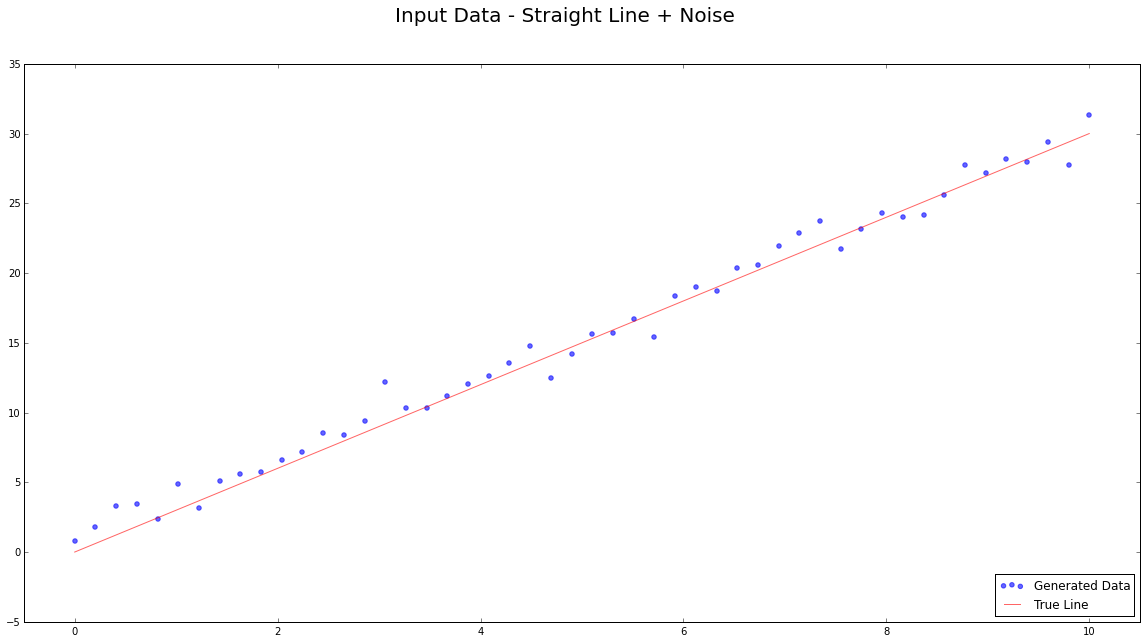

In [76]:
import matplotlib.pyplot as pyplot
%matplotlib inline

#Create a big graph
fig = pyplot.figure(figsize=(20, 10), dpi=100)

# Add a title and set the x limit
fig.suptitle('Input Data - Straight Line + Noise ', fontsize=20)

#Plot the generated data
generated_data = pyplot.scatter(x, y, color='b', alpha=0.6, label='Generated Data')

#Plot the line from which the data is taken
true_line, = pyplot.plot(x, 3.0*x, color='r', alpha=0.6, label='True Line')

#Add a legend
pyplot.legend(handles=[generated_data, true_line], loc=4)

#Remove some of the excess space on the graph
pyplot.xlim([x[0]-0.5,x[-1]+0.5])

<h1>Linear Regression</h1>
<p>Discover the distribution above</p>

In [71]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(x, y)

print 'y = ', model.coef_[0][0], 'x +', model.intercept_[0]

y =  2.90874946172 x + 0.889400868934


(array([-0.5]), array([ 10.5]))

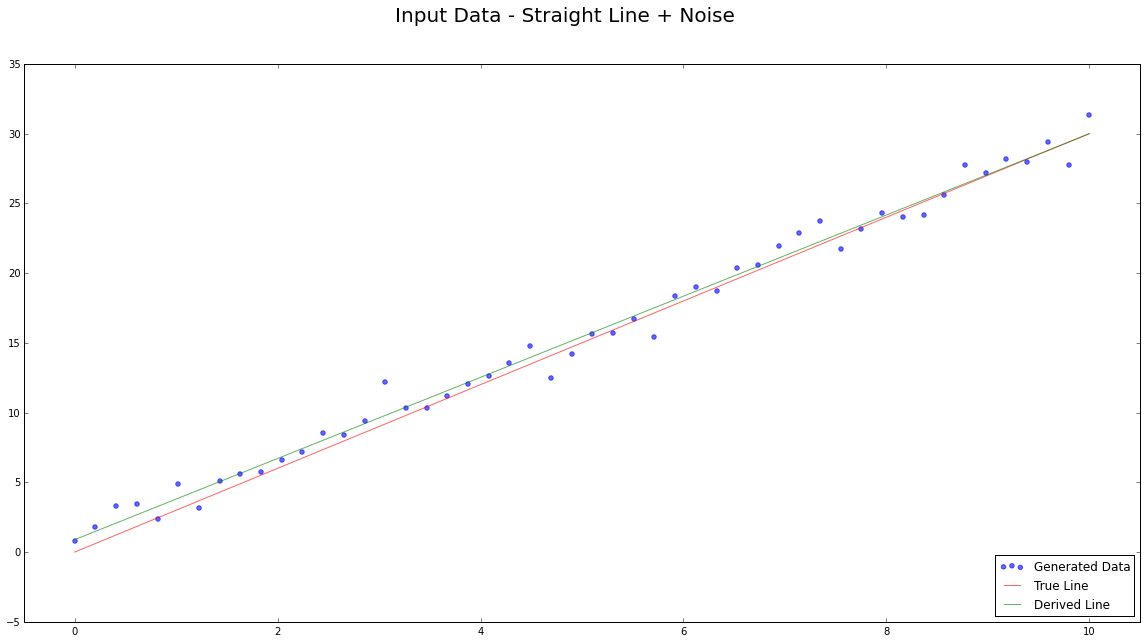

In [77]:
import matplotlib.pyplot as pyplot
%matplotlib inline

#Create a big graph
fig = pyplot.figure(figsize=(20, 10), dpi=100)

# Add a title and set the x limit
fig.suptitle('Input Data - Straight Line + Noise ', fontsize=20)

#Plot the generated data
generated_data = pyplot.scatter(x, y, color='b', alpha=0.6, label='Generated Data')

#Plot the line from which the data is taken
true_line, = pyplot.plot(x, 3.0*x, color='r', alpha=0.6, label='True Line')

#Plot the line from which the data is taken
derived_line, = pyplot.plot(x, model.coef_[0][0]*x + model.intercept_[0], color='g', alpha=0.6, label='Derived Line')

#Add a legend
pyplot.legend(handles=[generated_data, true_line, derived_line], loc=4)

#Remove some of the excess space on the graph
pyplot.xlim([x[0]-0.5,x[-1]+0.5])

/Users/simonsmith/Documents/time_date/venv_concepteast/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


(array([-0.5]), array([ 10.5]))

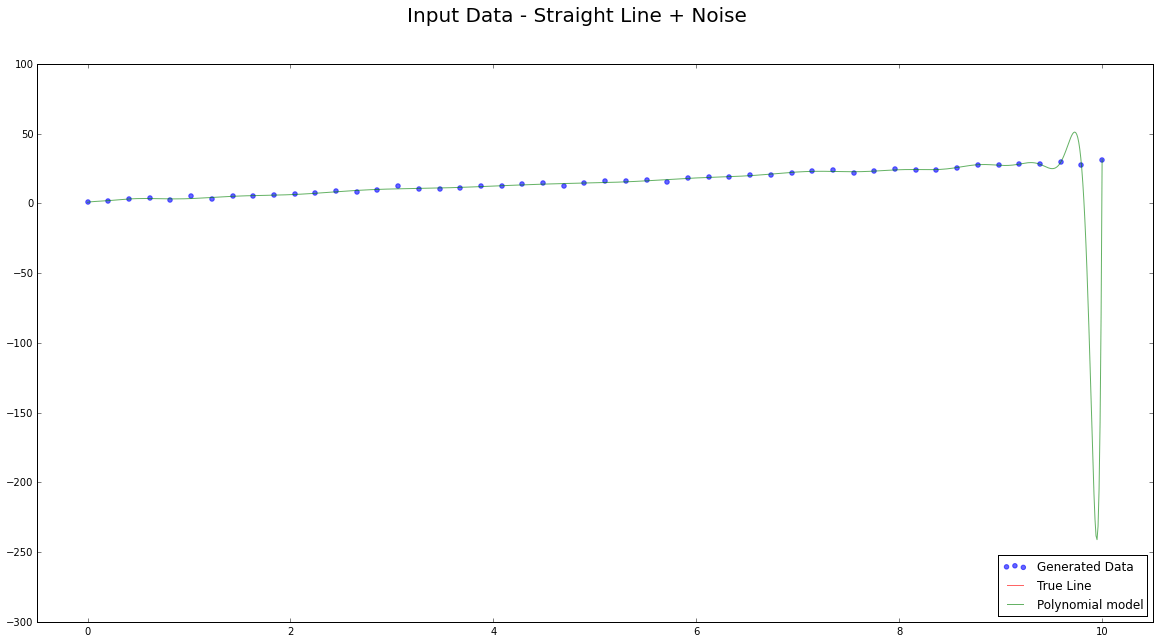

In [90]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

model = np.poly1d(np.polyfit(x.reshape(50),y.reshape(50), 49))
x_plot = np.linspace(0,10, 1000).reshape((1000,1))
y_plot = model(x_plot)

#Create a big graph
fig = pyplot.figure(figsize=(20, 10), dpi=100)

# Add a title and set the x limit
fig.suptitle('Input Data - Straight Line + Noise ', fontsize=20)

#Plot the generated data
generated_data = pyplot.scatter(x, y, color='b', alpha=0.6, label='Generated Data')

#Plot the line from which the data is taken
derived_line, = pyplot.plot(x_plot, y_plot, color='g', alpha=0.6, label='Polynomial model')

#Add a legend
pyplot.legend(handles=[generated_data, true_line, derived_line], loc=4)

#Remove some of the excess space on the graph
pyplot.xlim([x[0]-0.5,x[-1]+0.5])